<a href="https://colab.research.google.com/github/KarenMadlove/STACK_OVERFLOW_SURVEY_DATA_ANALYSIS/blob/main/STACK_OVERFLOW_SURVEY_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STACK OVERFLOW SURVEY DATA ANALYSIS**
 
by. 📊 Mirelle Caballero   📈  Cesar Castro   😎  Karen Madrigal 

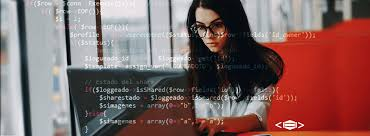

---
*Créditos imagen*: Educa2020 https://educa2020.es/2019/02/04/escasez-programadores-programadoras/*

---





# **Problema a resolver**: Contextualización 😮 ☝🏻

 Una de las habilidades digitales más requeridas corresponde a la programación de código. El desarrollo de talento por medio de la elección de carreras relacionadas a las TI, en los últimos 3 ciclos no han mostrado un crecimiento o decremento significativo, Este contexto también realza la consideración del surgimiento de la demanda por cambios demográficos como lo son los estudiantes no tradicionales, migrantes de retorno, mujeres con carreras discontinuas, egresados que demandan hibridaciones en sus carreras profesionales que les permitan inserción social y profesional o transiciones en la vida laboral (Cabero; 2007; Pérez; 2012 y The Economist Intelligence Unit, 2020). 

Así, en los contextos no formales están emergiendo comunidades de práctica orientadas al aprendizaje de programación de código como los coding bootcamps en vinculación con la industria, la academia, el gobierno y la sociedad civil que ofrecen a los estudiantes algún tipo de servicio de empleo y con la finalidad de: 
1. Disminuir la escasez de talento digital, 2. Como estrategia para disminuir el desempleo juvenil, y 3. Paliar las carencias del plan de estudios oficial respecto a los requerimientos que los empleadores tienen en el sector de Tecnologías de la información (TI) y la necesidad de habilidades prácticas de los egresados (UIT, 2016).

*Fuente: Gutiérrez, en proceso.*


---



# **Objetivos**: 🧐

**General**
Análizar los grupos que se están desarrollando en la industría de tech, en cuento a desarrollo de software.
-  

**Específicos**

1. Caracterizar el perfil de los desarrolladores.
2. Creación de grupos por edad- compensación y
3. Contrastar el ingreso y empleabilidad. 

---



# **Acceso a la información**: data bases 👨🏻‍💻 👩🏻‍💻

La encuesta de stack overflow para desarrolladores (y cualquier persona que codifique) hace levantamiento a más de 80 mil personas enfocadas a la codificación en el mundo. 

Ésta está divida en **seis secciones**:

1. Basic Information 
2. Education, Work, and Career 
3. Technology and Tech Culture 
4. Stack Overflow Usage + Community 
5. Demographic Information 
6. Final Questions 

De las cuales se tomaron 3 para este análisis:
1. Basic Information 
2. Education, Work, and Career 
5. Demographic Information

*Fuente data bases*: https://insights.stackoverflow.com/survey

---

# **LIMPIEZA Y PREPARACIÓN DE BD**  🤯 👨🏻‍💻 👩🏽‍💻 👩🏻‍💻 
Separador naranja 2.png

# **Paso 1** Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# **Paso 2** Cargar BD Overflow 2018-2020.

In [ ]:
Encuesta_Full= pd.read_csv('/content/OverFlow_full.csv', index_col=0)

Encuesta_Full

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Hobby,Year,Country,Region,Employment,FormalEducation,DevType,YearsCoding2,YearsCodingProf2,Currency,SalaryType,CompensationUSDC,CurrencySymbol,EducationTypes,Gender,RaceEthnicity,Age,EducationTypesPrimary,EducationTypesSecondary,DevType Primary,DevTypeSecondary
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Yes,2018,Kenya,Asia,Employed part-time,Bachelors Degree,Full-stack developer,4.0,4.0,NaN,Monthly,NA,KES,"Taught yourself a new language, framework, or ...",Male,Black or of African descent,28.0,"Taught yourself a new language, framework, or ...",Participated in a hackathon,Full-stack developer,NaN
2,Yes,2018,United Kingdom,Europa,Employed full-time,Bachelors Degree,Database administrator;DevOps specialist;Full-...,30.0,19.0,British pounds sterling (£),Yearly,70841,GBP,"Taught yourself a new language, framework, or ...",Male,White or of European descent,40.0,"Taught yourself a new language, framework, or ...",Contributed to open source software,Database administrator,DevOps specialist
3,Yes,2018,United States,North America,Employed full-time,Associate Degree ( Tecnical),Engineering manager;Full-stack developer,25.0,7.0,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Engineering manager,Full-stack developer
4,No,2018,United States,North America,Employed full-time,Bachelors Degree,Full-stack developer,19.0,13.0,U.S. dollars ($),NaN,NA,NaN,Completed an industry certification program (e...,Male,White or of European descent,40.0,Completed an industry certification program (e...,"Taught yourself a new language, framework, or ...",Full-stack developer,NaN
5,Yes,2018,South Africa,Asia,Employed full-time,Some college/university study without earning ...,Data or business analyst;Desktop or enterprise...,7.0,1.0,South African rands (R),Yearly,21426,ZAR,Taken a part-time in-person course in programm...,Male,White or of European descent,21.0,Taken a part-time in-person course in programm...,Received on-the-job training in software devel...,Data or business analyst,Desktop or enterprise applications developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165387,Yes,2020,United States,North America,Employed full-time,Masters Degree,Senior executive/VP,10.0,0.5,NaN,NaN,NA,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN,Senior executive/VP,NaN
165388,Yes,2020,Morocco,Africa,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NA,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN,NaN,NaN
165389,Yes,2020,Viet Nam,Asia,NaN,Primary/elementary school,NaN,NaN,NaN,NaN,NaN,NA,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN,NaN,NaN


# **Paso 3:** Exploración de Tipo de datos

In [ ]:
Encuesta_Full.dtypes

Hobby                       object
Year                         int64
Country                     object
Region                      object
Employment                  object
FormalEducation             object
DevType                     object
YearsCoding2               float64
YearsCodingProf2           float64
Currency                    object
SalaryType                  object
CompensationUSDC            object
CurrencySymbol              object
EducationTypes              object
Gender                      object
RaceEthnicity               object
Age                        float64
EducationTypesPrimary       object
EducationTypesSecondary     object
DevType Primary             object
DevTypeSecondary            object
dtype: object

# **Paso 4:**Corregir Tipo de Datos

In [ ]:
Encuesta_Full['CompensationUSDC'] = pd.to_numeric(Encuesta_Full['CompensationUSDC'], errors='coerce')


In [ ]:
Encuesta_Full['Age'] = pd.to_numeric(Encuesta_Full['Age'], errors='coerce')


In [ ]:
Encuesta_Full['Year'] = pd.to_numeric(Encuesta_Full['Year'], errors='coerce')


# **Paso 5:** Validación Cambios 

In [ ]:
Encuesta_Full.dtypes

Hobby                       object
Year                         int64
Country                     object
Region                      object
Employment                  object
FormalEducation             object
DevType                     object
YearsCoding2               float64
YearsCodingProf2           float64
Currency                    object
SalaryType                  object
CompensationUSDC           float64
CurrencySymbol              object
EducationTypes              object
Gender                      object
RaceEthnicity               object
Age                        float64
EducationTypesPrimary       object
EducationTypesSecondary     object
DevType Primary             object
DevTypeSecondary            object
dtype: object

# **Paso 6:** Validación de NANS en Base de Datos 

In [ ]:
Encuesta_Full.isna()

,Hobby,Year,Country,Region,Employment,FormalEducation,DevType,YearsCoding2,YearsCodingProf2,Currency,SalaryType,CompensationUSDC,CurrencySymbol,EducationTypes,Gender,RaceEthnicity,Age,EducationTypesPrimary,EducationTypesSecondary,DevType Primary,DevTypeSecondary
Respondent,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165387,False,False,False,False,False,False,False,False,False,True,True,True,True,False,True,True,True,False,True,False,True
165388,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,False,True,True,True
165389,False,False,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,False,True,True,True


# **Paso 7:** Cuantos NANS existen por columna

In [ ]:
Encuesta_Full.isna().sum(axis=0)

Hobby                         45
Year                           0
Country                      521
Region                         0
Employment                  2309
FormalEducation             9722
DevType                    22849
YearsCoding2                7730
YearsCodingProf2           34331
Currency                   40418
SalaryType                 54850
CompensationUSDC           68263
CurrencySymbol             40286
EducationTypes              7804
Gender                     20991
RaceEthnicity              35208
Age                        32270
EducationTypesPrimary       7804
EducationTypesSecondary    86169
DevType Primary            22849
DevTypeSecondary           65589
dtype: int64

# **Paso 8:** Cuantas filas se tiene NANS

In [ ]:
Encuesta_Full.isna().sum(axis=1)

Respondent
1          3
2          0
3         10
4          4
5          0
          ..
165387     9
165388    14
165389    14
165390    14
165391    13
Length: 165391, dtype: int64

In [ ]:
Encuesta_Full

,Hobby,Year,Country,Region,Employment,FormalEducation,DevType,YearsCoding2,YearsCodingProf2,Currency,SalaryType,CompensationUSDC,CurrencySymbol,EducationTypes,Gender,RaceEthnicity,Age,EducationTypesPrimary,EducationTypesSecondary,DevType Primary,DevTypeSecondary
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Yes,2018,Kenya,Asia,Employed part-time,Bachelors Degree,Full-stack developer,4.0,4.0,NaN,Monthly,NaN,KES,"Taught yourself a new language, framework, or ...",Male,Black or of African descent,28.0,"Taught yourself a new language, framework, or ...",Participated in a hackathon,Full-stack developer,NaN
2,Yes,2018,United Kingdom,Europa,Employed full-time,Bachelors Degree,Database administrator;DevOps specialist;Full-...,30.0,19.0,British pounds sterling (£),Yearly,70841.0,GBP,"Taught yourself a new language, framework, or ...",Male,White or of European descent,40.0,"Taught yourself a new language, framework, or ...",Contributed to open source software,Database administrator,DevOps specialist
3,Yes,2018,United States,North America,Employed full-time,Associate Degree ( Tecnical),Engineering manager;Full-stack developer,25.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Engineering manager,Full-stack developer
4,No,2018,United States,North America,Employed full-time,Bachelors Degree,Full-stack developer,19.0,13.0,U.S. dollars ($),NaN,NaN,NaN,Completed an industry certification program (e...,Male,White or of European descent,40.0,Completed an industry certification program (e...,"Taught yourself a new language, framework, or ...",Full-stack developer,NaN
5,Yes,2018,South Africa,Asia,Employed full-time,Some college/university study without earning ...,Data or business analyst;Desktop or enterprise...,7.0,1.0,South African rands (R),Yearly,21426.0,ZAR,Taken a part-time in-person course in programm...,Male,White or of European descent,21.0,Taken a part-time in-person course in programm...,Received on-the-job training in software devel...,Data or business analyst,Desktop or enterprise applications developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165387,Yes,2020,United States,North America,Employed full-time,Masters Degree,Senior executive/VP,10.0,0.5,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN,Senior executive/VP,NaN
165388,Yes,2020,Morocco,Africa,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN,NaN,NaN
165389,Yes,2020,Viet Nam,Asia,NaN,Primary/elementary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN,NaN,NaN


# **Paso 9:** Creación Data Frame / Modificación NANS por Unknown

In [ ]:
Encuesta_2 = Encuesta_Full
Encuesta_2['YearsCodingProf2'] = Encuesta_2['YearsCodingProf2'].fillna('Unknown')
Encuesta_2['FormalEducation'] = Encuesta_2['FormalEducation'].fillna('Unknown')
Encuesta_2['DevType'] = Encuesta_2['DevType'].fillna('Unknown')
Encuesta_2['Currency'] = Encuesta_2['Currency'].fillna('Unknown')
Encuesta_2['SalaryType'] = Encuesta_2['SalaryType'].fillna('Unknown')
Encuesta_2['CurrencySymbol'] = Encuesta_2['CurrencySymbol'].fillna('Unknown')
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].fillna('Unknown')
Encuesta_2['EducationTypesSecondary'] = Encuesta_2['EducationTypesSecondary'].fillna('Unknown')
Encuesta_2['Gender'] = Encuesta_2['Gender'].fillna('Unknown')
Encuesta_2['RaceEthnicity'] = Encuesta_2['RaceEthnicity'].fillna('Unknown')
Encuesta_2['Age'] = Encuesta_2['Age'].fillna('Unknown')
Encuesta_2['Year'] = Encuesta_2['Year'].fillna('Unknown')
Encuesta_2['YearsCoding2'] = Encuesta_2['YearsCoding2'].fillna('Unknown')
Encuesta_2['CompensationUSDC'] = Encuesta_2['CompensationUSDC'].fillna('Unknown')
Encuesta_2['Hobby'] = Encuesta_2['Hobby'].fillna('Unknown')
Encuesta_2['Country'] = Encuesta_2['Country'].fillna('Unknown')
Encuesta_2['Employment'] = Encuesta_2['Employment'].fillna('Unknown')
Encuesta_2['EducationTypes'] = Encuesta_2['EducationTypes'].fillna('Unknown')
Encuesta_2['DevType Primary'] = Encuesta_2['DevType Primary'].fillna('Unknown')
Encuesta_2['DevTypeSecondary'] = Encuesta_2['DevTypeSecondary'].fillna('Unknown')
Encuesta_2.isna().sum()

Hobby                      0
Year                       0
Country                    0
Region                     0
Employment                 0
FormalEducation            0
DevType                    0
YearsCoding2               0
YearsCodingProf2           0
Currency                   0
SalaryType                 0
CompensationUSDC           0
CurrencySymbol             0
EducationTypes             0
Gender                     0
RaceEthnicity              0
Age                        0
EducationTypesPrimary      0
EducationTypesSecondary    0
DevType Primary            0
DevTypeSecondary           0
dtype: int64

In [ ]:
Encuesta_2['CompensationUSDC'] = pd.to_numeric(Encuesta_2['CompensationUSDC'], errors='coerce')
Encuesta_2['Age'] = pd.to_numeric(Encuesta_2['Age'], errors='coerce')
Encuesta_2['YearsCodingProf'] = pd.to_numeric(Encuesta_2['YearsCodingProf'], errors='coerce')
Encuesta_2.dtypes

Hobby                       object
Year                         int64
Country                     object
Region                      object
Employment                  object
FormalEducation             object
DevType                     object
YearsCoding                 object
YearsCodingProf            float64
Currency                    object
SalaryType                  object
CompensationUSDC           float64
CurrencySymbol              object
EducationTypes              object
Gender                      object
RaceEthnicity               object
Age                        float64
EducationTypesPrimary       object
EducationTypesSecondary     object
DevType Primary             object
DevTypeSecondary            object
dtype: object

# **Paso 10** Reindexación

In [ ]:
Encuesta_2.reset_index()

,Respondent,Hobby,Year,Country,Region,Employment,FormalEducation,DevType,YearsCoding2,YearsCodingProf2,Currency,SalaryType,CompensationUSDC,CurrencySymbol,EducationTypes,Gender,RaceEthnicity,Age,EducationTypesPrimary,EducationTypesSecondary,DevType Primary,DevTypeSecondary
0,1,Yes,2018,Kenya,Asia,Employed part-time,Bachelors Degree,Full-stack developer,4.0,4.0,Unknown,Monthly,NaN,KES,"Taught yourself a new language, framework, or ...",Male,Black or of African descent,28.0,"Taught yourself a new language, framework, or ...",Participated in a hackathon,Full-stack developer,Unknown
1,2,Yes,2018,United Kingdom,Europa,Employed full-time,Bachelors Degree,Database administrator;DevOps specialist;Full-...,30.0,19.0,British pounds sterling (£),Yearly,70841.0,GBP,"Taught yourself a new language, framework, or ...",Male,White or of European descent,40.0,"Taught yourself a new language, framework, or ...",Contributed to open source software,Database administrator,DevOps specialist
2,3,Yes,2018,United States,North America,Employed full-time,Associate Degree ( Tecnical),Engineering manager;Full-stack developer,25.0,7.0,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Engineering manager,Full-stack developer
3,4,No,2018,United States,North America,Employed full-time,Bachelors Degree,Full-stack developer,19.0,13.0,U.S. dollars ($),Unknown,NaN,Unknown,Completed an industry certification program (e...,Male,White or of European descent,40.0,Completed an industry certification program (e...,"Taught yourself a new language, framework, or ...",Full-stack developer,Unknown
4,5,Yes,2018,South Africa,Asia,Employed full-time,Some college/university study without earning ...,Data or business analyst;Desktop or enterprise...,7.0,1.0,South African rands (R),Yearly,21426.0,ZAR,Taken a part-time in-person course in programm...,Male,White or of European descent,21.0,Taken a part-time in-person course in programm...,Received on-the-job training in software devel...,Data or business analyst,Desktop or enterprise applications developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165386,165387,Yes,2020,United States,North America,Employed full-time,Masters Degree,Senior executive/VP,10.0,0.5,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Senior executive/VP,Unknown
165387,165388,Yes,2020,Morocco,Africa,Employed full-time,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown
165388,165389,Yes,2020,Viet Nam,Asia,Unknown,Primary/elementary school,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown
165389,165390,Yes,2020,Poland,Europa,Employed full-time,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown


In [ ]:
Encuesta_2.isna().sum(axis=0)

Hobby                          0
Year                           0
Country                        0
Region                         0
Employment                     0
FormalEducation                0
DevType                        0
YearsCoding2                   0
YearsCodingProf2               0
Currency                       0
SalaryType                     0
CompensationUSDC           68263
CurrencySymbol                 0
EducationTypes                 0
Gender                         0
RaceEthnicity                  0
Age                        32270
EducationTypesPrimary          0
EducationTypesSecondary        0
DevType Primary                0
DevTypeSecondary               0
dtype: int64

# **Paso 11** Cambio de Nombre Columna

In [ ]:
Encuesta_2= Encuesta_2.rename(columns={'YearsCoding2': 'YearsCoding'})
Encuesta_2= Encuesta_2.rename(columns={'YearsCodingProf2': 'YearsCodingProf'})
Encuesta_2= Encuesta_2.rename(columns={'DevType Primary ': 'DevTypePrimary'})
Encuesta_2

,Hobby,Year,Country,Region,Employment,FormalEducation,DevType,YearsCoding,YearsCodingProf,Currency,SalaryType,CompensationUSDC,CurrencySymbol,EducationTypes,Gender,RaceEthnicity,Age,EducationTypesPrimary,EducationTypesSecondary,DevType Primary,DevTypeSecondary
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Yes,2018,Kenya,Asia,Employed part-time,Bachelors Degree,Full-stack developer,4.0,4.0,Unknown,Monthly,NaN,KES,"Taught yourself a new language, framework, or ...",Male,Black or of African descent,28.0,"Taught yourself a new language, framework, or ...",Participated in a hackathon,Full-stack developer,Unknown
2,Yes,2018,United Kingdom,Europa,Employed full-time,Bachelors Degree,Database administrator;DevOps specialist;Full-...,30.0,19.0,British pounds sterling (£),Yearly,70841.0,GBP,"Taught yourself a new language, framework, or ...",Male,White or of European descent,40.0,"Taught yourself a new language, framework, or ...",Contributed to open source software,Database administrator,DevOps specialist
3,Yes,2018,United States,North America,Employed full-time,Associate Degree ( Tecnical),Engineering manager;Full-stack developer,25.0,7.0,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Engineering manager,Full-stack developer
4,No,2018,United States,North America,Employed full-time,Bachelors Degree,Full-stack developer,19.0,13.0,U.S. dollars ($),Unknown,NaN,Unknown,Completed an industry certification program (e...,Male,White or of European descent,40.0,Completed an industry certification program (e...,"Taught yourself a new language, framework, or ...",Full-stack developer,Unknown
5,Yes,2018,South Africa,Asia,Employed full-time,Some college/university study without earning ...,Data or business analyst;Desktop or enterprise...,7.0,1.0,South African rands (R),Yearly,21426.0,ZAR,Taken a part-time in-person course in programm...,Male,White or of European descent,21.0,Taken a part-time in-person course in programm...,Received on-the-job training in software devel...,Data or business analyst,Desktop or enterprise applications developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165387,Yes,2020,United States,North America,Employed full-time,Masters Degree,Senior executive/VP,10.0,0.5,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Senior executive/VP,Unknown
165388,Yes,2020,Morocco,Africa,Employed full-time,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown
165389,Yes,2020,Viet Nam,Asia,Unknown,Primary/elementary school,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown


# **Paso 12**: Agregar usando MAP el Tipo de Moneda

In [ ]:
def convertir_comp_salary_a_usd(ConvertedCompAnual):
    
    return f'{ConvertedCompAnual} USD'




# **Paso 13:** Groupby por Género



In [ ]:
Encuesta_2.groupby('Gender').size()

Gender
Female                                                                          528
Female;Male                                                                       9
Female;Male;Non-binary, genderqueer, or gender non-conforming                     1
Female;Male;Transgender                                                           1
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming         7
Female;Non-binary, genderqueer, or gender non-conforming                          8
Female;Transgender                                                               12
Female;Transgender;Non-binary, genderqueer, or gender non-conforming              5
Male                                                                           7788
Male;Non-binary, genderqueer, or gender non-conforming                           22
Male;Transgender                                                                  3
Male;Transgender;Non-binary, genderqueer, or gender non-conforming   

# **Paso 14:** Modificar Strings 

In [ ]:
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Female;Male', 'No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Female;Male;Transgender', 'No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Female;Male;Non-binary, genderqueer, or gender non-conforming', 'No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Female;Non-binary, genderqueer, or gender non-conforming  ', 'No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Non-binary, genderqueer, or gender non-conforming', 'No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Male;No Binary', 'No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('No Binary;No Binary', 'No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('No Binary;Transgender;No Binary','No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Transgender;No Binary','No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('No Binary;Transgender','No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Female;No Binary','No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Female;Transgender','Transgender')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Male;Transgender','Transgender')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Man;No Binary','Transgender')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Woman;Transgender','Transgender')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Woman','Female')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Female;Man','No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Man','Male')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Female;No Binary','No Binary')
Encuesta_2['Gender'] = Encuesta_2['Gender'].str.replace('Male;No Binary','No Binary')

# **Paso 15:** Validación de la Modificación de Strings

In [ ]:
Encuesta_2.groupby('Gender').size()

Gender
Female          10716
Male           131719
No Binary        1540
Transgender       425
Unknown         20991
dtype: int64



---



# **ANÁLISIS E INTERPRETACIÓN DE RESULTADOS** 🤓 🧐 📊 📈 📉 
Separador naranja 2.png

# **Paso 16:** Estimados de locación y variabilidad 

- Obtenención de estimados de locación y variabilidad usando pandas 
- Valores típicos y atípicos
- Obtención de percentiles e interpretación

- a.Estimados de ubicación (valor típico) y opciones: promedio,mediana
- b.Estimados de variabilidad

   - Valores atípicos
   - Desviación estándar
   - Estadísticos de orden
-  Rango
   - Percentiles 
   - Rango intercurtilico  

---



## Compensación Anual: **$55,844 USD** 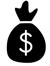 


In [ ]:
Encuesta_2['CompensationUSDC'].median()

55844.0

##**28** 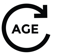


In [ ]:
Encuesta_2['Age'].median()

28.0

In [ ]:
Encuesta_2.describe()

,Year,CompensationUSDC,Age
count,165391.000000,9.712800e+04,133121.000000
mean,2019.316904,1.171290e+05,30.497855
std,0.601805,2.605094e+05,9.272473
min,2018.000000,1.000000e+00,1.000000
25%,2019.000000,2.578800e+04,24.000000
50%,2019.000000,5.584400e+04,28.000000
75%,2020.000000,9.850000e+04,35.000000
max,2020.000000,2.000000e+06,279.000000


👉🏼**Nota:** Entre mayor sea nuestro resultado quiere decir que nuestros datos están más dispersos (es decir, hay muchos datos que se alejan de nuestro valor típico i.e. la media); entre menor sea el resultado quiere decir que nuestros datos están menos dispersos (es decir, están más cerca de nuestro valor típico).

Obviamente hay que tomar en cuenta el rango de nuestros valores para determinar si nuestra desviación estándar es pequeña o grande. Por ejemplo, una desviación estándar de 10 es muy pequeña si nuestros valores tienen un rango de 1 000 000. En cambio, una desviación estándar de 10 es mucho mayor si nuestros valores tienen un rango de 40.

[ ]


---



🔴  **Obtención de percentiles**

In [ ]:
stats.trim_mean(Encuesta_2['CompensationUSDC'], 0.42)

236312.81698975927

In [ ]:
stats.trim_mean(Encuesta_2['Age'], 0.20)

33.347820829344485

In [ ]:
Encuesta_2['Age'].max() - Encuesta_2['Age'].min()

278.0

In [ ]:
Encuesta_2['CompensationUSDC'].max() - Encuesta_2['CompensationUSDC'].min()

1999999.0

In [ ]:
print(f'Valor mínimo: {Encuesta_2["Age"].min()}')
print(f'Percentil 3: {Encuesta_2["Age"].quantile(0.02)}')
print(f'Percentil 1: {Encuesta_2["Age"].quantile(0.10)}')
print(f'Percentil 25: {Encuesta_2["Age"].quantile(0.25)}')
print(f'Percentil 50: {Encuesta_2["Age"].median()}')
print(f'Percentil 75: {Encuesta_2["Age"].quantile(0.75)}')
print(f'Percentil 98: {Encuesta_2["Age"].quantile(0.98)}')
print(f'Percentil 100: {Encuesta_2["Age"].quantile(1)}')
print(f'Valor máximo: {Encuesta_2["Age"].max()}')
print()
print(f'Media: {Encuesta_2["Age"].mean()}')

Valor mínimo: 1.0
Percentil 3: 17.0
Percentil 1: 21.0
Percentil 25: 24.0
Percentil 50: 28.0
Percentil 75: 35.0
Percentil 98: 56.0
Percentil 100: 279.0
Valor máximo: 279.0

Media: 30.497855334620382


In [ ]:
print(f'Valor mínimo: {Encuesta_2["CompensationUSDC"].min()}')
print(f'Percentil 0: {Encuesta_2["CompensationUSDC"].quantile(0)}')
print(f'Percentil 5: {Encuesta_2["CompensationUSDC"].quantile(0.05)}')
print(f'Percentil 25: {Encuesta_2["CompensationUSDC"].quantile(0.25)}')
print(f'Percentil 50: {Encuesta_2["CompensationUSDC"].median()}')
print(f'Percentil 75: {Encuesta_2["CompensationUSDC"].quantile(0.75)}')
print(f'Percentil 90: {Encuesta_2["CompensationUSDC"].quantile(0.9)}')
print(f'Percentil 97: {Encuesta_2["CompensationUSDC"].quantile(0.97)}')
print(f'Valor máximo: {Encuesta_2["CompensationUSDC"].max()}')
print()
print(f'Media: {Encuesta_2["CompensationUSDC"].mean()}')

Valor mínimo: 1.0
Percentil 0: 1.0
Percentil 5: 5544.0
Percentil 25: 25788.0
Percentil 50: 55844.0
Percentil 75: 98500.0
Percentil 90: 167945.0
Percentil 97: 852354.2400000002
Valor máximo: 2000000.0

Media: 117128.97431224775


👉🏼 **Nota:** Rango intercuartílico
Otra medida muy común es lo que llamamos el rango intercuartílico, que es la diferencia entre el percentil 75 y el percentil 25. Este número nos da una idea del rango que tienen los valores más cercanos al valor típico.

In [ ]:
Encuesta_2["Age"].quantile(0.75) - Encuesta_2["Age"].quantile(0.25)

11.0

In [ ]:
Encuesta_2["CompensationUSDC"].quantile(0.75) - Encuesta_2["CompensationUSDC"].quantile(0.25)

72712.0



---



# **Paso 17:** Visualización de datos

Distribuciones son otra forma de visualziar las frecuencias (Se usa seaborn contruida sobre matplotlib)(histogramas y graficos de densidad). 
- Boxplots y de utilizar el Score de Rango Intercuartílico para identificar valores atípicos
- Elaborar histogramas utilizando Seaborn
- Histogramas utilizando conceptos de asimetría y curtosis (Interpretación)

🔴  **Boxplots**

***Edad***

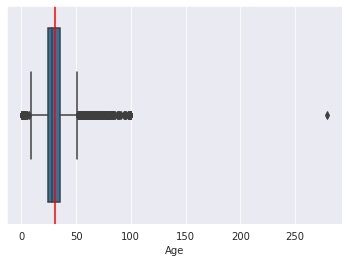

In [ ]:
sns.set_style("darkgrid") 
sns.boxplot(x=Encuesta_2['Age'])
plt.axvline(Encuesta_2['Age'].mean(), c='r')

👉🏻La edad ***promedio es de 30.5 años***, como se puede observar en la línea roja y verificar con los datos anteriores. El rango intercuartilíco(percentil 75 y el percentil 25). indica que el ***50% de las edades de los programadores respondientes ***están entre ***24 y 35 años***. 

En cuanto a datos atípicos, se observa que en el bigote superior es el derecho, mostrando los valores atípicos, es decir, personas que tienen más de ***59 años.***

Rango intercuartílico: Dentro de esta caja se encuentra el 50% de nuestros datos, los más cercanos a la mediana.

***Compensación Anual en Dólares***

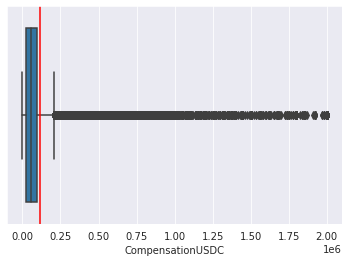

In [ ]:
sns.set_style("darkgrid") 
sns.boxplot(x=Encuesta_2['CompensationUSDC'])
plt.axvline(Encuesta_2['CompensationUSDC'].mean(), c='r')

In [ ]:
iqr = Encuesta_2['CompensationUSDC'].quantile(0.97) - Encuesta_2['CompensationUSDC'].quantile(0.05) # cuartil 3 - cuartil 1
filtro_inferior1 = Encuesta_2['CompensationUSDC'] > Encuesta_2['CompensationUSDC'].quantile(0.05) - (iqr * 1.5)
filtro_superior1 = Encuesta_2['CompensationUSDC'] < Encuesta_2['CompensationUSDC'].quantile(0.97) + (iqr * 1.5)
Encuesta_2.loc[Encuesta_2.CompensationUSDC<5544,'CompensationUSDC']='Unknown'
Encuesta_2.loc[Encuesta_2.CompensationUSDC>893688,'CompensationUSDC']='Unknown'

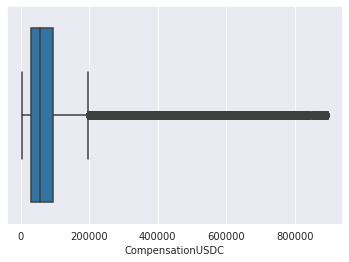

In [ ]:
sns.boxplot(x=Encuesta_2['CompensationUSDC'])

**Minímo de 5,544 años y máximo de 893,688 años. (Se quitó de la muestra el quantil de 5% y 97%)**

👉🏻La **Compensación Anual (USD)*** promedio es de **2,5788 USD**, y ***50% de los datos de la retribución a su trabajo como programadores oscila entre y 25,788 USD y $98,500 USD***.

En cuanto a ***datos atípicos***, se observa que en el ***bigote superior es el derecho***, mostrando los valores atípicos, es decir, personas que tienen más de ***200,0000 USD***
 
Media: 117, 128.97431224775

Rango intercuartílico: Dentro de esta caja se encuentra el 50% de nuestros datos, los más cercanos a la mediana.

In [ ]:
iqr = Encuesta_2['Age'].quantile(0.95) - Encuesta_2['Age'].quantile(0.05) # cuartil 3 - cuartil 1
filtro_inferior = Encuesta_2['Age'] > Encuesta_2['Age'].quantile(0.05) - (iqr * 1.5)
filtro_superior = Encuesta_2['Age'] < Encuesta_2['Age'].quantile(0.95) + (iqr * 1.5)
Encuesta_2.loc[Encuesta_2.Age<17,'Age']='Unknown'
Encuesta_2.loc[Encuesta_2.Age>56,'Age']='Unknown'

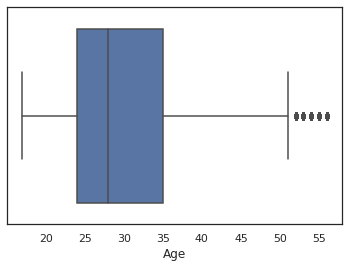

In [ ]:
sns.boxplot(x=Encuesta_2['Age'])

In [ ]:
Encuesta_2.describe()


,Year,YearsCodingProf,CompensationUSDC,Age
count,165391.000000,131060.000000,89519.000000,128449.000000
mean,2019.316904,8.047173,82627.221662,30.171601
std,0.601805,7.317624,106045.649199,7.950221
min,2018.000000,0.500000,5544.000000,17.000000
25%,2019.000000,4.000000,29376.000000,24.000000
50%,2019.000000,7.000000,57287.000000,28.000000
75%,2020.000000,10.000000,96000.000000,35.000000
max,2020.000000,50.000000,893688.000000,56.000000


**Minímo de 17 años y máximo de 56 años. (Se quitó de la muestra el quantil de 5% y 95%)**

In [ ]:
Encuesta_2020= Encuesta_2[Encuesta_2.Year.eq(2020)]
print(Encuesta_2020)

           Hobby  Year  ...        DevType Primary   DevTypeSecondary
Respondent              ...                                          
100931        No  2020  ...                Unknown            Unknown
100932       Yes  2020  ...  Developer, full-stack  Developer, mobile
100933       Yes  2020  ...                Unknown            Unknown
100934       Yes  2020  ...                Unknown            Unknown
100935        No  2020  ...                Unknown            Unknown
...          ...   ...  ...                    ...                ...
165387       Yes  2020  ...    Senior executive/VP            Unknown
165388       Yes  2020  ...                Unknown            Unknown
165389       Yes  2020  ...                Unknown            Unknown
165390       Yes  2020  ...                Unknown            Unknown
165391       Yes  2020  ...                Unknown            Unknown

[64461 rows x 21 columns]


In [ ]:
Encuesta_2019= Encuesta_2[Encuesta_2.Year.eq(2019)]
print(Encuesta_2019)

           Hobby  ...                               DevTypeSecondary
Respondent        ...                                               
12049        Yes  ...                                        Unknown
12050         No  ...                           Developer, front-end
12051        Yes  ...                            Developer, back-end
12052         No  ...                                        Unknown
12053        Yes  ...  Developer, desktop or enterprise applications
...          ...  ...                                            ...
100926       Yes  ...  Developer, desktop or enterprise applications
100927       Yes  ...                                        Unknown
100928        No  ...                                        Unknown
100929        No  ...                                        Unknown
100930        No  ...                                        Unknown

[88882 rows x 21 columns]


In [ ]:
Encuesta_2018= Encuesta_2[Encuesta_2.Year.eq(2018)]
print(Encuesta_2018)

           Hobby  ...                              DevTypeSecondary
Respondent        ...                                              
1            Yes  ...                                       Unknown
2            Yes  ...                             DevOps specialist
3            Yes  ...                          Full-stack developer
4             No  ...                                       Unknown
5            Yes  ...  Desktop or enterprise applications developer
...          ...  ...                                           ...
12044        Yes  ...                                       Unknown
12045        Yes  ...                      Data or business analyst
12046        Yes  ...                          Full-stack developer
12047        Yes  ...                                       Unknown
12048        Yes  ...                              Mobile developer

[12048 rows x 21 columns]


In [ ]:
Encuesta_2020['YearsCodingProf'] = Encuesta_2020['YearsCodingProf'].fillna('0')
Encuesta_2020['Age'] = Encuesta_2020['Age'].fillna('0')
Encuesta_2020['CompensationUSDC'] = Encuesta_2020['CompensationUSDC'].fillna('0')
Encuesta_2020['YearsCoding'] = Encuesta_2020['YearsCoding'].fillna('0')
Encuesta_2020.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Hobby                      0
Year                       0
Country                    0
Region                     0
Employment                 0
FormalEducation            0
DevType                    0
YearsCoding                0
YearsCodingProf            0
Currency                   0
SalaryType                 0
CompensationUSDC           0
CurrencySymbol             0
EducationTypes             0
Gender                     0
RaceEthnicity              0
Age                        0
EducationTypesPrimary      0
EducationTypesSecondary    0
DevType Primary            0
DevTypeSecondary           0
dtype: int64

In [ ]:
Encuesta_2020['CompensationUSDC'] = pd.to_numeric(Encuesta_2020['CompensationUSDC'], errors='coerce')
Encuesta_2020['Age'] = pd.to_numeric(Encuesta_2020['Age'], errors='coerce')
Encuesta_2020['YearsCodingProf'] = pd.to_numeric(Encuesta_2020['YearsCodingProf'], errors='coerce')
Encuesta_2.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Hobby                       object
Year                         int64
Country                     object
Region                      object
Employment                  object
FormalEducation             object
DevType                     object
YearsCoding                 object
YearsCodingProf            float64
Currency                    object
SalaryType                  object
CompensationUSDC           float64
CurrencySymbol              object
EducationTypes              object
Gender                      object
RaceEthnicity               object
Age                        float64
EducationTypesPrimary       object
EducationTypesSecondary     object
DevType Primary             object
DevTypeSecondary            object
dtype: object

🔴  **Histogramas**📊 

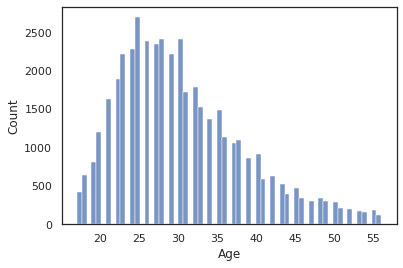

In [ ]:
sns.set_style('white')

# La función para dibujar histogramas es la función histplot()
sns.histplot(Encuesta_2020['Age']) #si el argumento único es la lista con los datos de interés
#sns.histplot(df['price'],kde=1, bins=20)


👉🏻La edad ***promedio de los encuestados del 2020 es de 30.17 años***, siendo muy similar a la edad promedio de la BD general de los encuestados del 2018-2020. Se observa la mayor participación de los encuestados  ***la curva muestra asimetría positiva (cola cargada a la derecha) *** observando que la cantidad de respondientes de acuerdo a la edad están entre ***24 y 33 años*** similar a la BD general. 

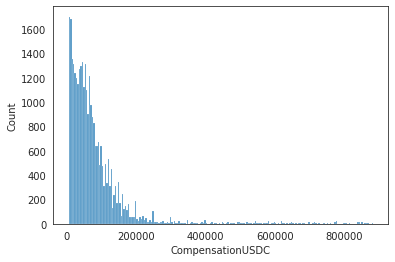

In [ ]:
sns.set_style('white')

# La función para dibujar histogramas es la función histplot()
sns.histplot(Encuesta_2020['CompensationUSDC']) #si el argumento único es la lista con los datos de interés
#sns.histplot(df['price'],kde=1, bins=20)

👉🏻En **Compensación USD Anual del 2020**  se observa la mayor participación de los encuestados  ***la curva muestra asimetría positiva (cola cargada a la derecha) *** observando que la compensación de  los respondientes están por debajo de los **200,000DLS** similar a la BD general. 

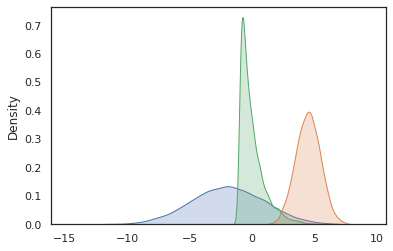

In [ ]:
sns.set(style='white')

Age= np.random.normal(loc=-2, scale=3, size=10000)
CompensationUSDC = np.random.normal(loc=4.5, scale=1, size=10000)
exponential = np.random.exponential(scale=1.0, size=10000) - 1

sns.kdeplot(Age,shade=True)
sns.kdeplot(CompensationUSDC,shade=True)
sns.kdeplot(exponential,shade=True)

**Nota:**
Azul: exponencial

Verde: Edad, cargada a la izquierda, es decir, a los más jovenes, menores de 30.

Naranja: compensación, está en pico, más relacionado a la media de los participantes de la encuesta.

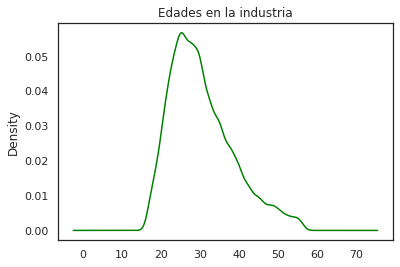

In [ ]:

Encuesta_2020.Age.plot.density(color='green') 
plt.title('Edades en la industria') 
plt.show()



In [ ]:
from seaborn import lmplot
from seaborn import kdeplot
from seaborn import barplot

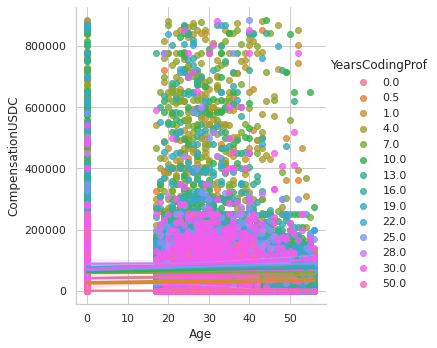

In [ ]:
lmplot(x="Age", y="CompensationUSDC", hue="YearsCodingProf", data=Encuesta_2020)

**Nota:** La mayor compensación en concordancia con los años de códificación es de 4 a 10 años dónde se encuentran los más altos.

In [ ]:
Programadores = Encuesta_2020.groupby(level=0)[['Age','CompensationUSDC']].mean() # Age , CompensationUSDC 
Genero = Encuesta_2020.groupby(level=0)['Gender'].last()                                 #Gender
merged = Programadores.merge(Genero, left_index=True, right_index=True)
Males = Programadores[merged['Gender'] == 'Male']
Females = Programadores[merged['Gender'] == 'Female']

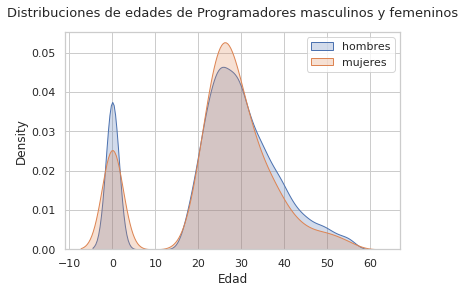

In [ ]:
# kdeplot lo ocupabábamos para dibujar densidades
# 'label' permite agregagar una etiqueta
# 'shade' coloreaba el interior suavemente
ax = sns.kdeplot(Males['Age'], label='hombres',shade=True)
sns.kdeplot(Females['Age'],shade=True, ax=ax, label='mujeres') ## ax = ax indica
# que lo haremos en el mismo plano o canvas
ax.set_title('Distribuciones de edades de Programadores masculinos y femeninos', fontsize=13, pad=15);
ax.set(xlabel='Edad'); # para el título del eje X
ax.legend(loc='upper right'); # para la posición de la leyenda

Nota: Edades por sexo. Edades similares. Jóvenes.  

# **Paso 18:** Exploración de variables categóricas y análisis multivariable

- Utilizar value_counts y moda para exploración de frecuencia de variables categóricas
- Tablas de  contingencia e interpretación (variables categóricas)
- Creación de subplots en una gráfica de Matplotlib
- Creación e interpretación boxplots y violinplots para exploración de la  distribución de --- variables numéricas segmentadas por una variable categórica.


In [ ]:
Encuesta_2020['Region'] = Encuesta_2020['Region'].str.replace('#N/D','Unknown')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Encuesta_2020['Region'].unique()  

array(['Europa', 'Rusia', 'Africa', 'North America', 'Asia',
       'LatinAmerica', 'Medio Oriente', 'Unknown', 'Australia', 'India'],
      dtype=object)

In [ ]:
Encuesta_2020['Region'].value_counts()

Europa           24638
North America    14660
Asia             13055
LatinAmerica      3920
Medio Oriente     2411
Africa            1668
Unknown           1330
Australia         1208
Rusia             1171
India              400
Name: Region, dtype: int64

In [ ]:
counts = Encuesta_2020['Region'].value_counts()
counts

Europa           24638
North America    14660
Asia             13055
LatinAmerica      3920
Medio Oriente     2411
Africa            1668
Unknown           1330
Australia         1208
Rusia             1171
India              400
Name: Region, dtype: int64

In [ ]:
counts.index

Index(['Europa', 'North America', 'Asia', 'LatinAmerica', 'Medio Oriente',
       'Africa', 'Unknown', 'Australia', 'Rusia', 'India'],
      dtype='object')

In [ ]:
counts * 100 / counts.sum()

Europa           38.221560
North America    22.742433
Asia             20.252556
LatinAmerica      6.081196
Medio Oriente     3.740246
Africa            2.587611
Unknown           2.063263
Australia         1.874001
Rusia             1.816602
India             0.620530
Name: Region, dtype: float64

In [ ]:
as_percentages = counts * 100 / counts.sum()

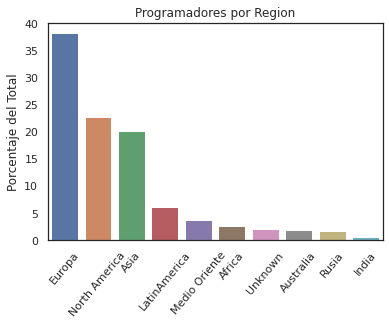

In [ ]:


ax = sns.barplot(x=as_percentages.index, y=as_percentages) # x = categorías, y = frecuencia de cada
# categoría
ax.set_title('Programadores por Region')
ax.set(ylabel='Porcentaje del Total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

**Nota:** Europa y norteamérica representan la mayor parte de la muestra.

In [ ]:
bins1 = [0, 30000, 60000, 90000, 120000, 1000000]


In [ ]:
names1 = ["Menores a 30,000", "De 30,001 A 60,000", "DE 60,001 A 90,000","DE 90,001 A 120,000","MAYORES DE 120,000"      ]

In [ ]:
Encuesta_2020['CompensationUSDC'] = pd.cut(Encuesta_2020['CompensationUSDC'], bins1, labels = names1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Encuesta_2020['CompensationUSDC'] = pd.to_numeric(Encuesta_2020['CompensationUSDC'], errors='coerce')
Encuesta_2020['Age'] = pd.to_numeric(Encuesta_2020['Age'], errors='coerce')
Encuesta_2020['YearsCodingProf'] = pd.to_numeric(Encuesta_2020['YearsCodingProf'], errors='coerce')
Encuesta_2020['YearsCoding'] = pd.to_numeric(Encuesta_2020['YearsCoding'], errors='coerce')
Encuesta_2020.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Hobby                       object
Year                         int64
Country                     object
Region                      object
Employment                  object
FormalEducation             object
DevType                     object
YearsCoding                float64
YearsCodingProf            float64
Currency                    object
SalaryType                  object
CompensationUSDC           float64
CurrencySymbol              object
EducationTypes              object
Gender                      object
RaceEthnicity               object
Age                        float64
EducationTypesPrimary       object
EducationTypesSecondary     object
DevType Primary             object
DevTypeSecondary            object
dtype: object

In [ ]:
bins = [0, 1, 5, 10, 50]


In [ ]:
names = ["Menores a 1 año", "Entre un año y 5","Entre 5 y 10","Mas de 10 años"       ]

In [ ]:
Encuesta_2020['YearsCodingProf'] = pd.cut(Encuesta_2020['YearsCodingProf'], bins, labels = names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
crosstab = pd.crosstab(Encuesta_2020['YearsCodingProf'], Encuesta_2020['CompensationUSDC'])
print(crosstab)

CompensationUSDC  Menores a 30,000  ...  MAYORES DE 120,000
YearsCodingProf                     ...                    
Menores a 1 año               2585  ...                 339
Entre un año y 5              3063  ...                 798
Entre 5 y 10                  1871  ...                1442
Mas de 10 años                 769  ...                2456

[4 rows x 5 columns]


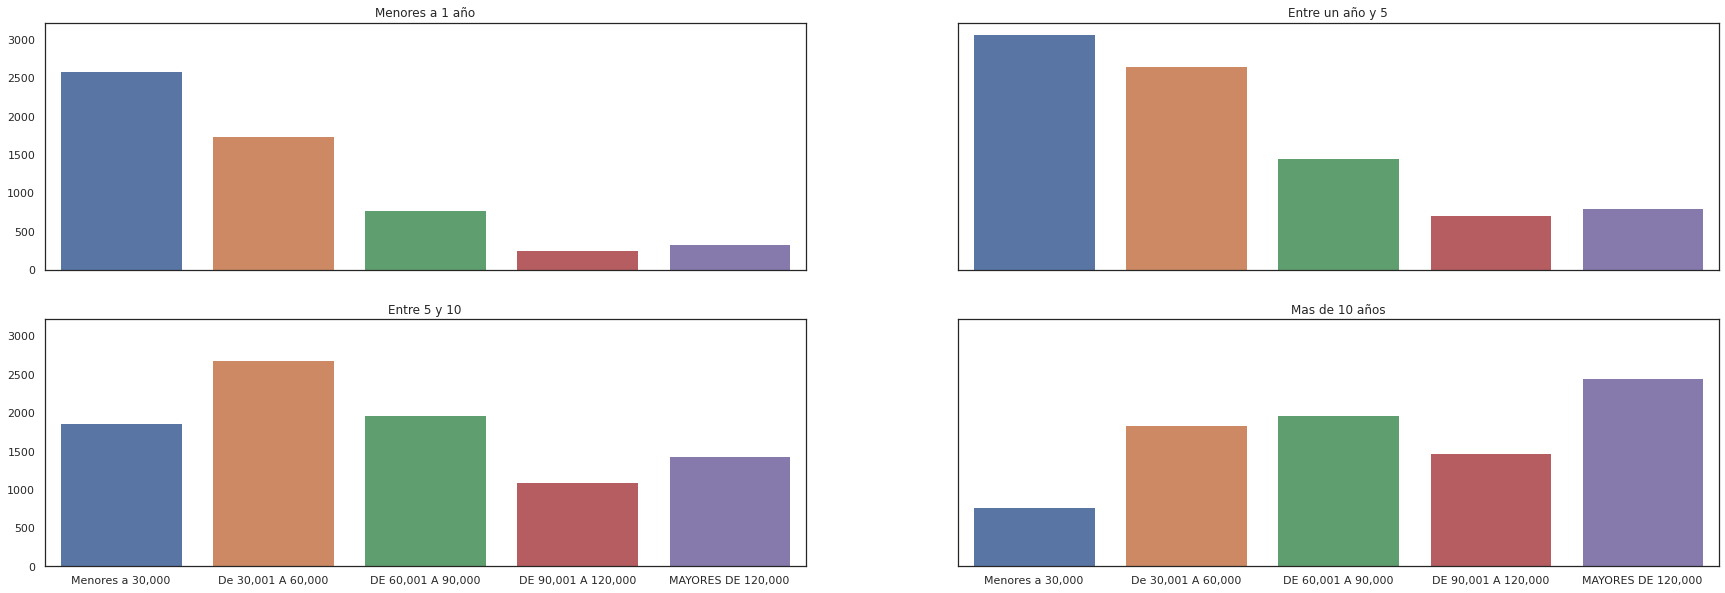

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(30, 10), sharex=True, sharey=True)

sns.barplot(x=crosstab.columns, y=crosstab.loc['Menores a 1 año'], ax=axes[0, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc['Entre un año y 5'], ax=axes[0, 1])
sns.barplot(x=crosstab.columns, y=crosstab.loc['Entre 5 y 10'], ax=axes[1, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc['Mas de 10 años'], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='Menores a 1 año')
axes[0, 1].set(xlabel='', ylabel='', title='Entre un año y 5')
axes[1, 0].set(xlabel='', ylabel='', title='Entre 5 y 10')
axes[1, 1].set(xlabel='', ylabel='', title='Mas de 10 años')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

**Nota:** Experiencia vs ingresos.

Mayores de 10 años tienen la mayor cantidad de ingresos.

In [ ]:
Encuesta_genero = Encuesta_2020.groupby(level=0)[['Age','CompensationUSDC']].mean()
Genero = Encuesta_2020.groupby(level=0)['Gender'].last()


In [ ]:
merged = Encuesta_genero.merge(Genero, left_index=True, right_index=True)
merged

,Age,CompensationUSDC,Gender
Respondent,,,
100931,NaN,NaN,Unknown
100932,NaN,NaN,Unknown
100933,25.0,NaN,Male
100934,31.0,NaN,Male
100935,NaN,NaN,Male
...,...,...,...
165387,NaN,NaN,Unknown
165388,NaN,NaN,Unknown
165389,NaN,NaN,Unknown


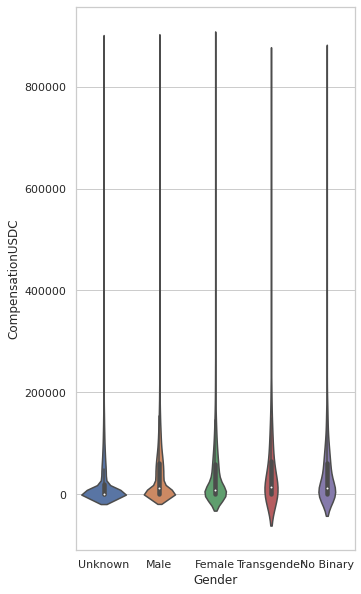

In [ ]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='Gender', y='CompensationUSDC');


**Nota: ** Genero vs Compensación
 Por genero no se muetsran tantas diferncias en la concentración de datos y los ingresos son menores a 200 mil dólares.

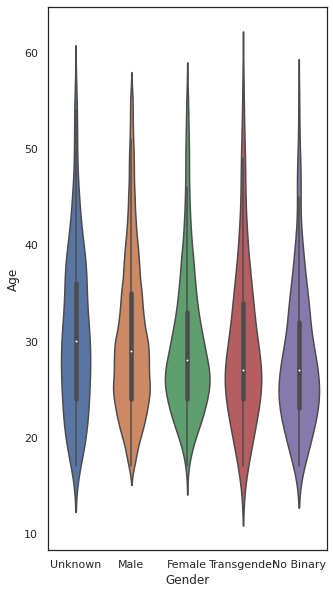

In [ ]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='Gender', y='Age');

# **Paso 19:** Correlaciones y Regresión Lineal Simple

- Determinación del Coeficiente de Correlación de Pearson 
- Matrices de correlación y graficarlas usando mapas de calor
- Creación e interpretación de  scatterplots con dos variables numéricas
- Modelo de Regresión Lineal Simple (uso de la librería  scikit-learn)

**Nota:** El proceso a través del cual encontramos los valores para el coeficiente my el intercepto b se llama 'entrenamiento'. El algoritmo y los parámetros que estamos utilizando (en este caso los que definen cómo llevar a cabo la regresión lineal) los llamamos el modelo.


In [ ]:
Encuesta_2020.corr()

,Year,YearsCoding,YearsCodingProf,CompensationUSDC,Age
Year,NaN,NaN,NaN,NaN,NaN
YearsCoding,NaN,1.000000,0.858407,0.200298,0.027012
YearsCodingProf,NaN,0.858407,1.000000,0.202786,0.024954
CompensationUSDC,NaN,0.200298,0.202786,1.000000,0.014027
Age,NaN,0.027012,0.024954,0.014027,1.000000


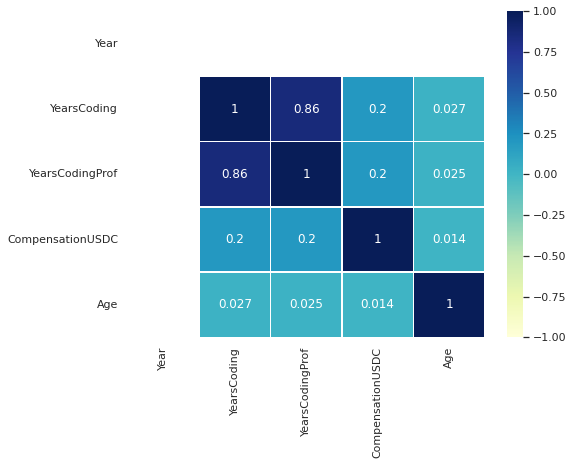

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(Encuesta_2020.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

**Nota**: a mayor experiencia a mayor ingreso. Hipótesis. Sin embargo es una correlación baja de acuerdo al mapa de calor. 0.2785

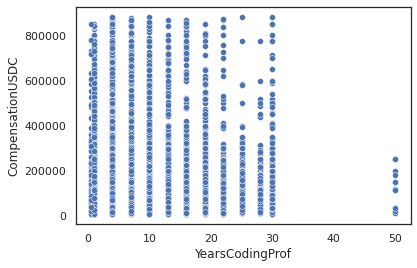

In [ ]:
sns.scatterplot(x=Encuesta_2020['YearsCodingProf'], y=Encuesta_2020['CompensationUSDC']);

**Nota:** Se eliminaron los ceros para intentar descifrar si podíamos tener una correlación mayor. 

In [ ]:
Encuesta_no_zeros = Encuesta_2020[Encuesta_2020['CompensationUSDC'] > 0]

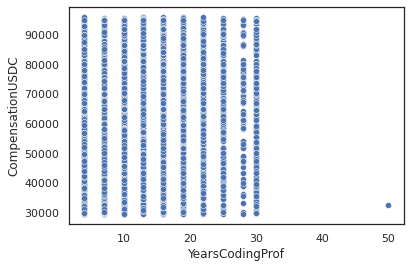

In [ ]:
sns.scatterplot(x=Encuesta_no_zeros1['YearsCodingProf'], y=Encuesta_no_zeros1['CompensationUSDC']);

In [ ]:
Compensationgreater_than_zero = (Encuesta_2020['CompensationUSDC'] > 29376) & (Encuesta_2020['CompensationUSDC'] < 96000)
years_coding_than_zero = Encuesta_2020['YearsCodingProf'] >1  & (Encuesta_2020['YearsCodingProf'] < 10)
Age_than_Zero = Encuesta_2020['Age'] >1  & (Encuesta_2020['Age'] < 50)
Encuesta_no_zeros1 = Encuesta_2020[Compensationgreater_than_zero & years_coding_than_zero & Age_than_Zero ]

**Nota:** Se aplicó los percentiles a variables de ingreso y experiencia para lograr tener una correlación más alta. Sin obtener éxito dado qu ebaja la correlación a 0.14.

In [ ]:
Encuesta_no_zeros1

,Hobby,Year,Country,Region,Employment,FormalEducation,DevType,YearsCoding,YearsCodingProf,Currency,SalaryType,CompensationUSDC,CurrencySymbol,EducationTypes,Gender,RaceEthnicity,Age,EducationTypesPrimary,EducationTypesSecondary,DevType Primary,DevTypeSecondary
Respondent,,,,,,,,,,,,,,,,,,,,,
100940,Yes,2020,United Kingdom,Europa,Employed full-time,Masters Degree,"Database administrator;Developer, full-stack;D...",7.0,4.0,Pound sterling,Yearly,32315.0,GBP,Unknown,Male,White or of European descent,23.0,Unknown,Unknown,Database administrator,"Developer, full-stack"
100943,Yes,2020,Netherlands,Europa,Employed full-time,Secondary School,"Designer;Developer, back-end",30.0,19.0,European Euro,Monthly,38916.0,EUR,Unknown,Male,White or of European descent,27.0,Unknown,Unknown,Designer,"Developer, back-end"
100947,Yes,2020,United States,North America,Employed full-time,Bachelors Degree,"Developer, full-stack",7.0,4.0,United States dollar,Yearly,79000.0,USD,Unknown,Male,White or of European descent,32.0,Unknown,Unknown,"Developer, full-stack",Unknown
100949,Yes,2020,United States,North America,Employed full-time,Bachelors Degree,"Developer, full-stack",10.0,4.0,United States dollar,Yearly,83400.0,USD,Unknown,Male,White or of European descent,40.0,Unknown,Unknown,"Developer, full-stack",Unknown
100962,Yes,2020,Canada,North America,Employed full-time,Bachelors Degree,"Developer, back-end;Developer, desktop or ente...",19.0,10.0,Canadian dollar,Monthly,31764.0,CAD,Unknown,Male,White or of European descent,39.0,Unknown,Unknown,"Developer, back-end","Developer, desktop or enterprise applications"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162539,No,2020,Australia,Australia,Employed full-time,Bachelors Degree,"Designer;Developer, back-end;Developer, deskto...",22.0,4.0,Australian dollar,Yearly,76831.0,AUD,Unknown,Male,White or of European descent,47.0,Unknown,Unknown,Designer,"Developer, back-end"
162545,Yes,2020,United States,North America,Employed full-time,Bachelors Degree,"Developer, full-stack",7.0,4.0,United States dollar,Yearly,53000.0,USD,Unknown,Male,White or of European descent,30.0,Unknown,Unknown,"Developer, full-stack",Unknown
162601,Yes,2020,France,Europa,Employed full-time,Associate Degree ( Tecnical),"Developer, back-end;Developer, front-end;Devel...",19.0,16.0,European Euro,Yearly,50806.0,EUR,Unknown,Male,Unknown,31.0,Unknown,Unknown,"Developer, back-end","Developer, front-end"


In [ ]:
Encuesta_no_zeros1 ['CompensationUSDC'].corr(Encuesta_no_zeros['YearsCodingProf'])

0.14594518312922508

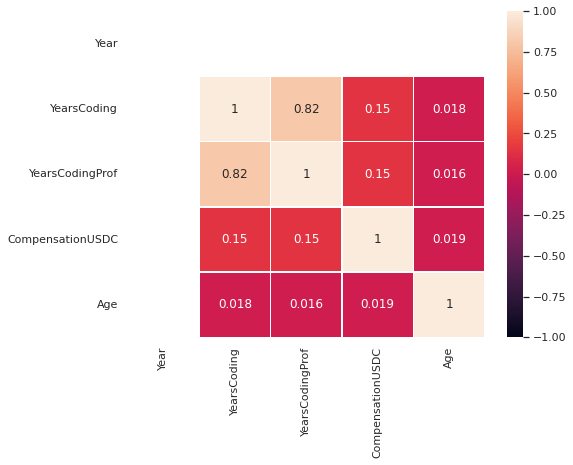

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(Encuesta_no_zeros1.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5);

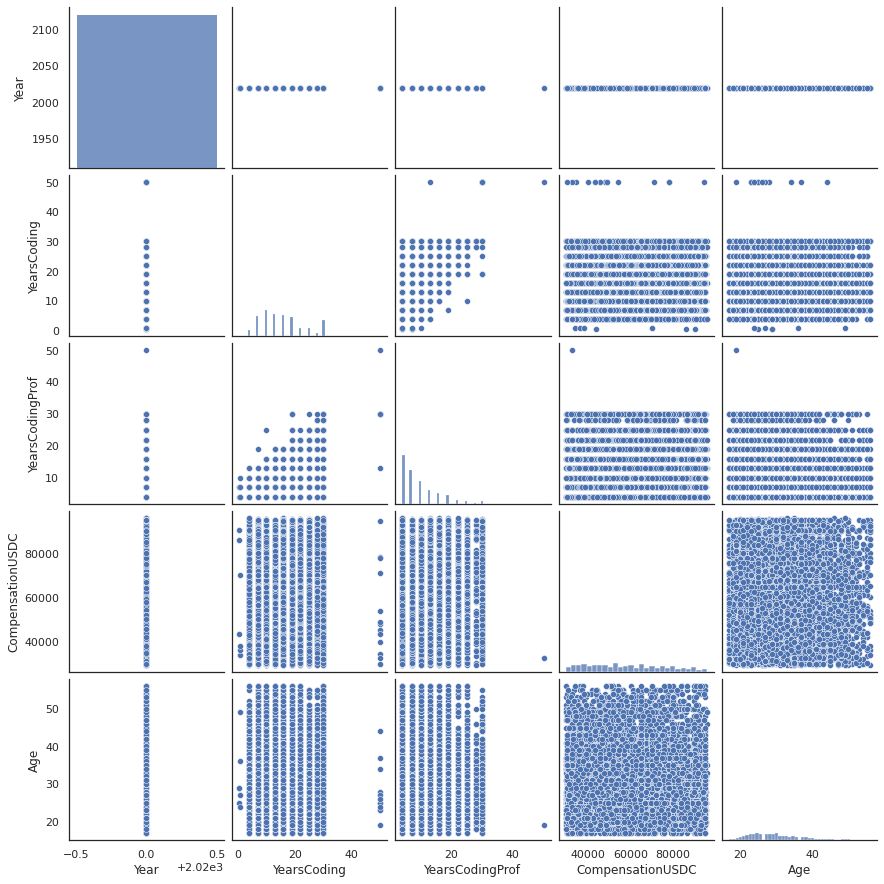

In [ ]:
sns.pairplot(Encuesta_no_zeros1)

**NOTA:** Se corrió un pplot par ver si exitía visualmente otra variable que se correlacionará. SIN EMBARGO, NO SE ENCONTRÓ NINGUNA.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = Encuesta_no_zeros1[['CompensationUSDC', 'YearsCodingProf']]
y = Encuesta_no_zeros1['Age']

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

-0.00019581957162384533

**Nota:** Se corrió una regresión líneal múltiple, sin embargo, no se logró un mayor efecto de correlación o de predictores.

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)

LinearRegression()

In [ ]:
lr_2.score(X, y)

0.0005250327882493355

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
scores = cross_validate(lr, X, y, scoring='r2')

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: -0.002 +/- 0.001


# **Paso 20:** Visualización de datos avanzada e interpretación (Seaborn y  Matpotli librerías)

- Sesgos y  muestreo aleatorio
- Tipos de gráficas para exploración y mejor entendimiento  de un conjunto de datos.
       * Estilos 
       * Treemaps (jerarquía)--- Programadores


***Consulta propuesta***
1. (H, M), enc ada una de las áreas de desarrollo (front end, ciencias de datos, back end. Etc). 
2. (Hobres, Mujeres que empiezan a programar a edad más temprana).(Edades por rangos en adolescencia- edad universitaria- etc.)

- Diagramas de dispersión

***Consulta Propuesta*** 
 ingreso y edad o ingreso y numero de años desarrollando codigo y compararlo entre hombres y mujeres. o entre areas de desarrollo. 
             
              -* Scatterplots por categorías ---
       * Scatterplots con variables condicionales 

***Consulta Propuesta***(tipo de desarrollo)    
       
       * Binning Hexagonal.

**Nota:** Los binnings hexagonales son herramientas muy útiles para cuando queremos visualizar la relación entre dos variables numéricas en un conjunto de datos que contienen un gran número de filas. Observe que seaborn coloca además un histograma para cada variable, para hacer muy evidente también cómo participa cada variable para generar la densidad de puntos en la gráfica
ingreso y edad o ingreso y numero de años desarrollando codigo (ver densidad)

       * Mapas coropléticos y gráficas de barras apiladas

***Consulta Propuesta:***
       (participación de los encuestados)




In [ ]:
Encuesta_tree= pd.read_csv('/content/2020_Prim_sec_gender.csv', index_col=0)

Encuesta_tree

,Gender,DevType Primary,DevTypeSecondary
Region,,,
Asia,Man,Developer back-end,Developer front-end
North America,Man,Developer back-end,Developer desktop or enterprise applications
Europa,Man,Database administrator,Developer full-stack
Europa,Man,Developer back-end,Developer desktop or enterprise applications
Europa,Man,Designer,Developer front-end
...,...,...,...
North America,Man,Developer full-stack,DevOps specialist
North America,Man,Data or business analyst,Data scientist or machine learning specialist
Europa,Man,Academic researcher,Data or business analyst


In [ ]:
Encuesta_tree.groupby('Gender').size()

Gender
Man                                                            26936
Man;Non-binary, genderqueer, or gender non-conforming             69
Non-binary, genderqueer, or gender non-conforming                222
Woman                                                           2181
Woman;Man                                                         48
Woman;Man;Non-binary, genderqueer, or gender non-conforming       19
Woman;Non-binary, genderqueer, or gender non-conforming           50
dtype: int64

In [ ]:
Encuesta_tree['Gender'] = Encuesta_tree['Gender'].str.replace('Man;Non-binary, genderqueer, or gender non-conforming', 'No Binary')
Encuesta_tree['Gender'] = Encuesta_tree['Gender'].str.replace('Non-binary, genderqueer, or gender non-conforming', 'No Binary')
Encuesta_tree['Gender'] = Encuesta_tree['Gender'].str.replace('Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'No Binary')
Encuesta_tree['Gender'] = Encuesta_tree['Gender'].str.replace('Woman;Non-binary, genderqueer, or gender non-conforming', 'No Binary')
Encuesta_tree['Gender'] = Encuesta_tree['Gender'].str.replace('Woman;Man', 'No Binary')
Encuesta_tree['Gender'] = Encuesta_tree['Gender'].str.replace('Woman;No Binary', 'No Binary')

In [ ]:
Encuesta_tree.groupby('Gender').size()

Gender
Man          26936
No Binary      408
Woman         2181
dtype: int64

In [ ]:
Encuesta_tree['count'] = 1

In [ ]:
Encuesta_tree

,Gender,DevType Primary,DevTypeSecondary,count
Region,,,,
Asia,Man,Developer back-end,Developer front-end,1
North America,Man,Developer back-end,Developer desktop or enterprise applications,1
Europa,Man,Database administrator,Developer full-stack,1
Europa,Man,Developer back-end,Developer desktop or enterprise applications,1
Europa,Man,Designer,Developer front-end,1
...,...,...,...,...
North America,Man,Developer full-stack,DevOps specialist,1
North America,Man,Data or business analyst,Data scientist or machine learning specialist,1
Europa,Man,Academic researcher,Data or business analyst,1


In [ ]:
fig = px.treemap(Encuesta_tree, path=['Gender','DevType Primary'], values='count')
fig.show()

**Nota:** Treemap: para gráficar las variables categoricas de género vs forma de aprendizaje complementaria  ( es decir, fuera del sistema educativo nacional).

In [ ]:
import plotly.express as px

In [ ]:
Encuesta_agrupada = Encuesta_no_zeros1.groupby('Respondent')[['Country','CompensationUSDC','Age','Gender']].max()

In [ ]:
Mexico = Encuesta_agrupada[Encuesta_agrupada['Country'] == 'Mexico']

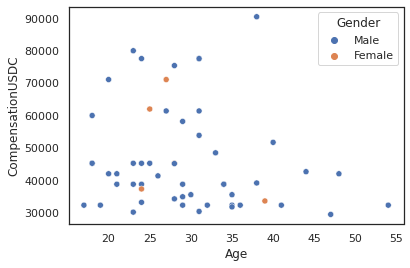

In [ ]:
sns.scatterplot(x=Mexico['Age'], y=Mexico['CompensationUSDC'],hue=Mexico['Gender']);


**Nota:** Los datos de México, indican que genero e ingreso con relación a la edad. De 20 a 35 años son los ingresos más altos con media de 35,000 a 40,000 dólares.

In [ ]:
LatinAmerica = Encuesta_2020[Encuesta_2020['Region'] == 'LatinAmerica']
Europa = Encuesta_2020[Encuesta_2020['Region'] == 'Europa']
NorthAmerica= Encuesta_2020[Encuesta_2020['Region'] == 'North America']
Asia = Encuesta_2020[Encuesta_2020['Region'] == 'Asia']

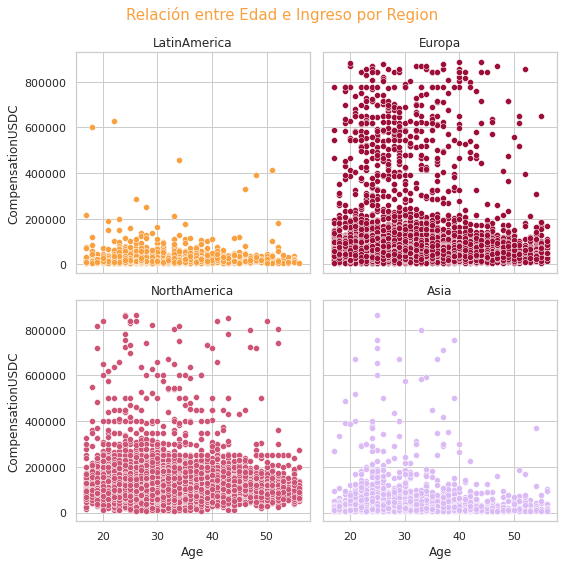

In [ ]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True) # Muy importante. Dice que van compartir canvas o ejes o plano

# Dibujo cada scatterplot

sns.scatterplot(x = LatinAmerica['Age'], y = LatinAmerica['CompensationUSDC'], ax=axes[0, 0], color=palette[4])
sns.scatterplot(x = Europa['Age'], y = Europa['CompensationUSDC'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(x = NorthAmerica['Age'], y = NorthAmerica['CompensationUSDC'], ax=axes[1, 0], color=palette[2])
sns.scatterplot(x= Asia['Age'], y = Asia['CompensationUSDC'], ax=axes[1, 1], color=palette[3]);


#Le pongo título a las subgraficas
axes[0, 0].set_title('LatinAmerica')
axes[0, 1].set_title('Europa')
axes[1, 0].set_title('NorthAmerica')
axes[1, 1].set_title('Asia')

# Le pongo título a la grafica
fig.suptitle('Relación entre Edad e Ingreso por Region', fontsize=15, c=palette[4], x=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

**Nota:** Relación ingresos, edd y género. 
Latinoamérica de los peores pagados y el mejor pagado Europa y norteamérica.

In [ ]:
value_counts_all = Encuesta_2['EducationTypesPrimary'].value_counts()

value_counts_all

Unknown                                        72265
Online(e.g. a MOOC)                            54950
Autodidact                                     17242
JobTrain                                        8951
Part-Time Face to Face                          3845
Bootcamp                                        3738
Certificaction (e.g. MCPD)                      2852
Other                                           1062
Other (e.g. HackerRank, CodeChef, TopCoder)      486
Name: EducationTypesPrimary, dtype: int64

In [ ]:
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].str.replace('Taken an online course in programming or software development ','Online')
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].str.replace('Taught yourself a new language, framework, or tool without taking a formal course','Autodidact')
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].str.replace('Received on-the-job training in software development', 'JobTrain')
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].str.replace('Taken a part-time in-person course in programming or software development', 'Part-Time Face to Face')
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].str.replace('Participated in a full-time developer training program or bootcamp', 'Bootcamp')
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].str.replace('Completed an industry certification program', 'Certificaction')
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].str.replace('Contributed to open source software', 'Other')
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].str.replace('Participated in online coding competitions','Other')
Encuesta_2['EducationTypesPrimary'] = Encuesta_2['EducationTypesPrimary'].str.replace('Participated in a hackathon','Other')

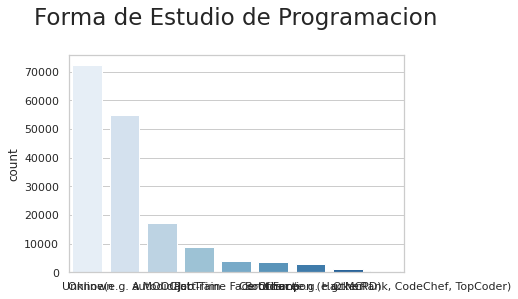

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x= value_counts_all.index, y= value_counts_all,palette='Blues');

ax.set_ylabel('count')
ax.set_title('Forma de Estudio de Programacion', fontsize=23, pad=30);

**Nota:** Forma de estudio de programación. de 2018- 2020
Online(e.g. a MOOC)                            54950

Autodidact                                     17242

JobTrain                                        8951

Part-Time Face to Face                          3845

Bootcamp                                        3738

Certificaction (e.g. MCPD)                      2852

Other                                           1062

Other (e.g. HackerRank, CodeChef, TopCoder)      486

# **Paso 21:** Machine Learning: Clasificación No Supervisada---Kmedias

- El agrupamiento por K-Medias es un algoritmo de Machine Learning y corresponde a una clasificación no supervisada.


In [ ]:
Encuesta_2020_filtered= pd.read_csv('/content/Over_2020_Kmed.csv', index_col=0)

Encuesta_2020_filtered

,Region,YearsCoding2,YearsCodingProf2,CompensationUSDC,Gender,Age
Country,,,,,,
United Kingdom,Europa,30.0,19.0,70841,Male,40
South Africa,Asia,7.0,1.0,21426,Male,21
United Kingdom,Europa,7.0,4.0,41671,Male,21
United States,North America,10.0,1.0,120000,Male,21
United States,North America,30.0,22.0,250000,Male,40
...,...,...,...,...,...,...
Zimbabwe,Africa,4.0,1.0,3600,Man,24
Finland,Europa,4.0,1.0,22056,Woman,33
United States,North America,28.0,19.0,150000,Man,28


In [ ]:
Encuesta_2020_filtered['Gender'] = Encuesta_2020_filtered['Gender'].str.replace('Male','1')
Encuesta_2020_filtered['Gender'] = Encuesta_2020_filtered['Gender'].str.replace('Female','2')
Encuesta_2020_filtered['Gender'] = Encuesta_2020_filtered['Gender'].str.replace('No Binary','3')
Encuesta_2020_filtered['Gender'] = Encuesta_2020_filtered['Gender'].str.replace('Transgender','3')
Encuesta_2020_filtered['Gender'] = Encuesta_2020_filtered['Gender'].str.replace('Unknown','3')

In [ ]:
Encuesta_2020.groupby('Gender').size()

Gender
1    46012
2     3844
3    14605
dtype: int64

In [ ]:
Encuesta_2020['Gender'] = pd.to_numeric(Encuesta_2020['Gender'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Encuesta_2020.dtypes

Hobby                       object
Year                         int64
Country                     object
Region                      object
Employment                  object
FormalEducation             object
DevType                     object
YearsCoding                float64
YearsCodingProf            float64
Currency                    object
SalaryType                  object
CompensationUSDC           float64
CurrencySymbol              object
EducationTypes              object
Gender                       int64
RaceEthnicity               object
Age                        float64
EducationTypesPrimary       object
EducationTypesSecondary     object
DevType Primary             object
DevTypeSecondary            object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



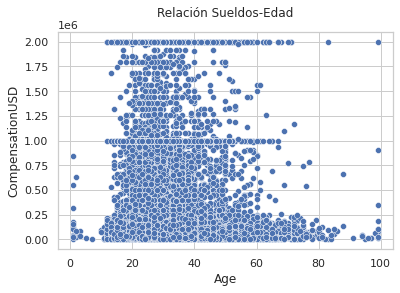

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Relación Sueldos-Edad', pad=15)
ax.set_xlabel('Age')
ax.set_ylabel('CompensationUSD')

sns.scatterplot(Encuesta_2020_filtered['Age'], Encuesta_2020_filtered['CompensationUSDC'], ax=ax);

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters=6, max_iter=10000)

In [ ]:
k_means.fit(Encuesta_2020_filtered[['Age', 'CompensationUSDC']])

KMeans(max_iter=10000, n_clusters=6)

In [ ]:
centers = k_means.cluster_centers_

centers

array([[3.01158889e+01, 2.96269285e+04],
       [3.08411725e+01, 1.01546882e+06],
       [3.05707317e+01, 1.94660073e+06],
       [3.10158029e+01, 2.17551287e+05],
       [3.06148760e+01, 6.04719852e+05],
       [3.09501409e+01, 9.92723586e+04]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



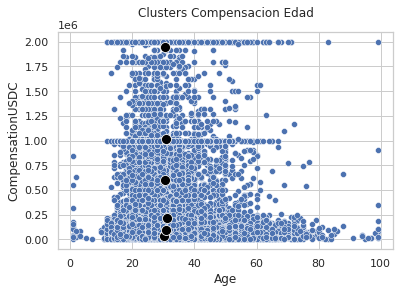

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Clusters Compensacion Edad', pad=15)
ax.set_xlabel('Age')
ax.set_ylabel('CompensationUSDC')

sns.scatterplot(Encuesta_2020_filtered['Age'], Encuesta_2020_filtered['CompensationUSDC'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

Se proponen 6 clusteres, compensación- edad. 

1 y 2. Edades similares 30.  2 clusteres menores de 250,000 dólares. ( los más robustos)
3. Edades similares 30.  1 clusteres centroíde 550,000 dólares.
4. Edades similares 30.  1 clusteres centroíde 1´000,000 dólares.
5. dades similares 30.  1 clusteres centroíde CERCANO a los 2 millones de  dólares.


# **Agrupaciones multivariable**

In [ ]:
Encuesta_2020.groupby(['Gender', 'Age'])['YearsCodingProf'].value_counts()

Gender           Age      YearsCodingProf
Man              1.0      0-2 years          1
                          15-17 years        1
                          9-11 years         1
                 3.0      0-2 years          1
                 5.0      3-5 years          1
                                            ..
Woman;No Binary  41.0     Unknown            1
                 42.0     Unknown            1
                 Unknown  15-17 years        3
                          Unknown            3
                          3-5 years          2
Name: YearsCodingProf, Length: 2026, dtype: int64

In [ ]:
print (Encuesta_2020["CompensationUSDC"])

Respondent
100931   NaN
100932   NaN
100933   NaN
100934   NaN
100935   NaN
          ..
165387   NaN
165388   NaN
165389   NaN
165390   NaN
165391   NaN
Name: CompensationUSDC, Length: 64461, dtype: float64


# **Uso de filtros**

In [ ]:
Encuesta_filtro= Encuesta_2[["CompensationUSDC","Region","Gender","Age"]]

In [ ]:
Encuesta_filtro

,CompensationUSDC,Region,Gender,Age
Respondent,,,,
1,NaN,Asia,Male,Unknown
2,70841.0,Europa,Male,Unknown
3,NaN,North America,Unknown,Unknown
4,NaN,North America,Male,Unknown
5,21426.0,Asia,Male,Unknown
...,...,...,...,...
165387,NaN,North America,Unknown,Unknown
165388,NaN,Africa,Unknown,Unknown
165389,NaN,Asia,Unknown,Unknown


In [ ]:
Encuesta_filtro_2=Encuesta_2020[["CompensationUSDC"]]

In [ ]:
def convertir_comp_salary_a_usd(Encuesta_filtro_2):
    
    return f'{Encuesta_filtro_2} USD'

In [ ]:
list(map(convertir_comp_salary_a_usd,Encuesta_filtro_2))

['CompensationUSDC USD']

In [ ]:

print (Encuesta_filtro.query("Region=='LatinAmerica' and Gender=='Male'"))



            CompensationUSDC        Region Gender      Age
Respondent                                                
65                       NaN  LatinAmerica   Male  Unknown
77                   64116.0  LatinAmerica   Male  Unknown
85                       NaN  LatinAmerica   Male  Unknown
98                       NaN  LatinAmerica   Male  Unknown
102                      NaN  LatinAmerica   Male  Unknown
...                      ...           ...    ...      ...
11974                    NaN  LatinAmerica   Male  Unknown
11984                    NaN  LatinAmerica   Male  Unknown
11990                    NaN  LatinAmerica   Male  Unknown
12028                11436.0  LatinAmerica   Male  Unknown
12040                    NaN  LatinAmerica   Male  Unknown

[421 rows x 4 columns]


In [ ]:

print (Encuesta_filtro.query("Region=='LatinAmerica' or Gender=='Female'"))




            CompensationUSDC         Region   Gender      Age
Respondent                                                   
8                        NaN         Africa   Female  Unknown
19                       NaN           Asia   Female  Unknown
20                       NaN   LatinAmerica  Unknown  Unknown
33                   44000.0  North America   Female  Unknown
34                   60000.0  North America   Female  Unknown
...                      ...            ...      ...      ...
165162                   NaN   LatinAmerica      Man       19
165339                   NaN   LatinAmerica  Unknown  Unknown
165341                   NaN   LatinAmerica      Man       44
165352                   NaN   LatinAmerica  Unknown       23
165358                   NaN   LatinAmerica      Man  Unknown

[9676 rows x 4 columns]


In [ ]:
print (Encuesta_2020[Encuesta_2020[['CompensationUSDC']].notnull().all(1)])

           Hobby  ...                               DevTypeSecondary
Respondent        ...                                               
100938        No  ...  Developer, desktop or enterprise applications
100940       Yes  ...                          Developer, full-stack
100941        No  ...  Developer, desktop or enterprise applications
100942       Yes  ...                           Developer, front-end
100943       Yes  ...                            Developer, back-end
...          ...  ...                                            ...
165073        No  ...                            Developer, back-end
165079        No  ...                                        Unknown
165083       Yes  ...                           Developer, front-end
165084       Yes  ...                          Developer, QA or test
165085       Yes  ...                                        Unknown

[34614 rows x 21 columns]


In [ ]:
Encuesta_2.groupby('Gender')['CompensationUSDC'].agg(pd.Series.mode)

NameError: ignored

In [ ]:
Encuesta_2020.groupby('Age')['CompensationUSDC'].agg(['mean','median','std'])

,mean,median,std
Age,,,
1.0,69262.666667,27144.0,74254.496465
3.0,37056.000000,37056.0,NaN
5.0,162150.000000,162150.0,NaN
7.0,4404.000000,4404.0,NaN
10.0,80000.000000,80000.0,NaN
...,...,...,...
97.0,16464.000000,16464.0,NaN
98.0,4226.000000,4226.0,NaN
99.0,62623.166667,51346.5,44400.305037


La media de Compensación Anual de los desarrolladores en la encuesta 2020 

In [ ]:
Encuesta_2020['CompensationUSDC'].mean()

104181.69755012423

La mediana de Compensacion Anual de los desarrolladores en la encuesta 2020

In [ ]:
Encuesta_2020['CompensationUSDC'].median()


54049.0

In [ ]:
Encuesta_2020[['Age']].median()

Series([], dtype: float64)

In [ ]:
Encuesta_2018 = pd.read_csv('/content/OverFlow_2018_sin_simbolos.csv')
Encuesta_2018['Country']


0                 Kenya
1        United Kingdom
2         United States
3         United States
4          South Africa
              ...      
12043     United States
12044            Brazil
12045             India
12046            Mexico
12047     United States
Name: Country, Length: 12048, dtype: object

 # **Futuro trabajo:** 🔮

  **Conclusiones generales:**

La encuesta de Stack overflow arroja datos interesantes en el contexto internacional, y alcanza a dar luz sobre los desarrolladores 
en México, sin embargo, se requiere tropizalizar esta encuesta compuesta de **46** variables  y 84000 mil respondientes para el caso mexicano revisando la pertinencia de las preguntas. 

Se propone realizar un estudio mixto en donde se realice un cuestionario con las preguntas a fin al contexto como lo ha hecho el IJALTI en Jalisco con la encuesta de la OCDE.

Uso de diccionarios

La encuesta de Stack overflow arroja datos interesantes en el contexto internacional, y alcanza a dar luz sobre los desarrolladores 
en México, sin embargo, se requiere tropizalizar esta encuesta compuesta de **46** variables  y 84000 mil respondientes para el caso mexicano revisando la pertinencia de las preguntas. 

Se propone realizar un estudio mixto en donde se realice un cuestionario con las preguntas a fin al contexto como lo ha hecho el IJALTI en Jalisco con la encuesta de la OCDE.
    



In [ ]:
#Uso de diccionarios: formulario adaptación encuesta Mx
respondent = {
    "email": "eduardoor@gmail.com",
    "hobby": "cine",
    "country": "México",
    "estado": "Jalisco",
    "student": "Management",
    "employment": "front end",
    "yearscoding": "13",
    "yearscodingProf": "7",
    "currency": "pesos",
    "salary": "35,000 a 45,000",
    "salarytype": "Eduardo",
    "convertedcompanual": "Eduardo",
    "currencysymbol": "Eduardo",
    "educationcoding": "Eduardo",
    "nameuniversity": "ITESO",
    "educationparents": "university",
    "raceethnicity": "Eduardo",
    "age": 36
}							